# **QSAR Model Building of PARP-1 Inhibitors**

Abhiram Jyosyula

# Read in data

In [1]:
import pandas as pd

In [3]:

dataset = pd.read_csv('PARP1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3229           1           1           1           1           0           0   
3230           1           1           1           0           0           0   
3231           1           1           1           0           0           0   
3232           1           1           1           0           0           0   
3233           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
3229           0           0           0           1  ...             0   
3230           0           0           0           1  ...             0   
3231           0           0           0           1  ...             0   
3232           0           0           0           1  ...             0   
3233           0           0           0           1  ...             0   

      PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
3229             0             0             0             0             0   
3230             0             0             0             0             0   
3231             0             0             0             0             0   
3232             0             0             0             0             0   
3233             0             0             0             0             0   

      PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0                0             0             0  5.301030  
1                0             0             0  7.698970  
2                0             0             0  5.522879  
3                0             0             0  7.522879  
4                0             0             0  7.455932  
...            ...           ...           ...       ...  
3229             0             0             0  8.337242  
3230             0             0             0  6.705534  
3231             0             0             0  8.096910  
3232             0             0             0  9.096910  
3233             0             0             0  7.876148  

[3234 rows x 882 columns]

In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3229           1           1           1           1           0           0   
3230           1           1           1           0           0           0   
3231           1           1           1           0           0           0   
3232           1           1           1           0           0           0   
3233           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
3229           0           0           0           1  ...             0   
3230           0           0           0           1  ...             0   
3231           0           0           0           1  ...             0   
3232           0           0           0           1  ...             0   
3233           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
3229             0             0             0             0             0   
3230             0             0             0             0             0   
3231             0             0             0             0             0   
3232             0             0             0             0             0   
3233             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
3229             0             0             0             0  
3230             0             0             0             0  
3231             0             0             0             0  
3232             0             0             0             0  
3233             0             0             0             0  

[3234 rows x 881 columns]

In [5]:
Y = dataset.iloc[:,-1]
Y

0       5.301030
1       7.698970
2       5.522879
3       7.522879
4       7.455932
          ...   
3229    8.337242
3230    6.705534
3231    8.096910
3232    9.096910
3233    7.876148
Name: pIC50, Length: 3234, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

PubchemFP2  PubchemFP12  PubchemFP16  PubchemFP19  PubchemFP20  \
0              1            1            0            1            1   
1              1            1            1            1            1   
2              1            1            1            1            1   
3              1            1            1            1            1   
4              1            1            0            1            1   
...          ...          ...          ...          ...          ...   
3229           1            1            1            1            1   
3230           1            1            1            1            0   
3231           1            1            1            1            1   
3232           1            1            0            0            0   
3233           1            1            1            1            0   

      PubchemFP23  PubchemFP33  PubchemFP143  PubchemFP145  PubchemFP146  ...  \
0               0            0             0             0             0  ...   
1               0            1             0             0             0  ...   
2               0            0             1             0             0  ...   
3               0            1             0             0             0  ...   
4               0            1             0             0             0  ...   
...           ...          ...           ...           ...           ...  ...   
3229            1            0             0             0             0  ...   
3230            1            0             0             0             0  ...   
3231            0            0             0             0             0  ...   
3232            1            0             1             1             1  ...   
3233            1            0             1             1             1  ...   

      PubchemFP755  PubchemFP756  PubchemFP758  PubchemFP776  PubchemFP779  \
0                1             0             0             1             0   
1                0             0             0             1             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
3229             1             0             1             0             0   
3230             1             0             0             0             0   
3231             1             1             1             0             0   
3232             1             0             1             1             0   
3233             0             0             1             0             0   

      PubchemFP797  PubchemFP800  PubchemFP818  PubchemFP819  PubchemFP821  
0                1             0             1             0             1  
1                0             1             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
3229             1             0             1             0             1  
3230             1             0             1             0             0  
3231             1             0             1             1             1  
3232             0             1             1             0             1  
3233             1             0             0             0             1  

[3234 rows x 189 columns]

In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8420452285952822

## Model Prediction

In [13]:
Y_pred = model.predict(X)
Y_pred

array([5.92873232, 7.21930379, 5.98280308, ..., 7.41184743, 7.97887654,
       7.89533779])

## Model Performance

In [14]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.27
Coefficient of determination (R^2): 0.84


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

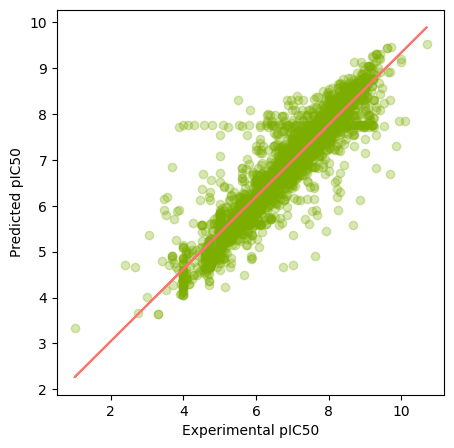

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [17]:
import pickle

In [19]:
pickle.dump(model, open('3class_PARP1_RandomForest_model.pkl', 'wb'))